#Importing required packages

In [120]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.multiclass import OneVsRestClassifier

#Importing the dataset and understanding it  

In [121]:
df = pd.read_csv("full_data.csv")
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


we will print first 5 rows of the dataset

In [122]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


we will print last 5 rows of the dataset

In [123]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [124]:
df.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1403,Male,56.0,0,0,Yes,Private,Rural,97.50,36.3,formerly smoked,0
4184,Female,17.0,0,0,No,Private,Urban,81.51,19.5,formerly smoked,0
3130,Male,63.0,0,0,Yes,Private,Urban,105.52,37.9,formerly smoked,0
1082,Female,35.0,0,0,Yes,Govt_job,Urban,82.39,33.2,never smoked,0
4721,Female,51.0,0,0,Yes,Govt_job,Urban,95.16,42.7,formerly smoked,0


determining the data types of each and every column

In [125]:
df.info

<bound method DataFrame.info of       gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type

In [126]:
columns=df.columns

In [127]:
for i in columns:
   print(i," : ",df[i].nunique())

gender  :  2
age  :  104
hypertension  :  2
heart_disease  :  2
ever_married  :  2
work_type  :  4
Residence_type  :  2
avg_glucose_level  :  3895
bmi  :  342
smoking_status  :  4
stroke  :  2


In [128]:
for i in columns:
   if (df[i].nunique() <7):
     print(i,df[i].unique())

gender ['Male' 'Female']
hypertension [0 1]
heart_disease [1 0]
ever_married ['Yes' 'No']
work_type ['Private' 'Self-employed' 'Govt_job' 'children']
Residence_type ['Urban' 'Rural']
smoking_status ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke [1 0]


In [129]:
df['stroke'].unique()

array([1, 0])

 describing the data as we want to know the statistics of the data

In [130]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


we can find the number of unique values from this

In [131]:
df.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

categorical columns and Leaving space between value counts 

In [132]:
for i in df.select_dtypes('object'):      
    print(df[i].value_counts())

    print(" ")
    print(" ")

Female    2907
Male      2074
Name: gender, dtype: int64
 
 
Yes    3280
No     1701
Name: ever_married, dtype: int64
 
 
Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64
 
 
Urban    2532
Rural    2449
Name: Residence_type, dtype: int64
 
 
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64
 
 


we will describe some of the columns

In [133]:

print(df.age.describe())
print("description of column age \n\n")
print(df["heart_disease"].describe())
print("description of column heart_disease \n\n")
print(df["bmi"].describe())
print("description of column bmi \n\n")


count    4981.000000
mean       43.419859
std        22.662755
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64
description of column age 


count    4981.000000
mean        0.055210
std         0.228412
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: heart_disease, dtype: float64
description of column heart_disease 


count    4981.000000
mean       28.498173
std         6.790464
min        14.000000
25%        23.700000
50%        28.100000
75%        32.600000
max        48.900000
Name: bmi, dtype: float64
description of column bmi 




To check the null values in the dataset. 0 indicates that their is no null value 


In [134]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

now we will find the corelation between the columns

In [135]:
corelation = df.corr()

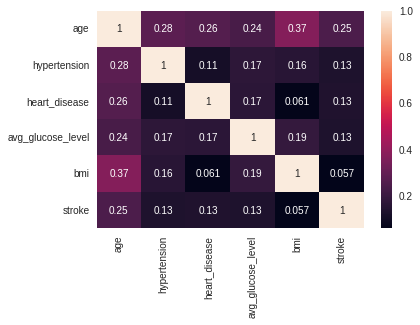

In [136]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns,annot=True)

now we will take the names of each and every column in a list named lis

In [137]:
lis = list(df.columns)
print(lis)

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


now we will box plot for all the columns that have numeric value as we can determine weather there are any outliers in that column or not

we can determine that there are no outliers in column age

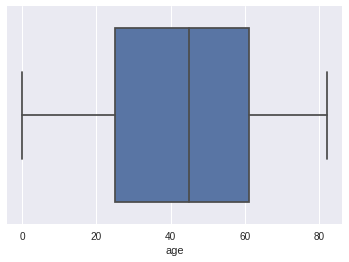

In [138]:
sns.boxplot(x=df.age)

we can determine that there are outliers in avg_glucose_level column

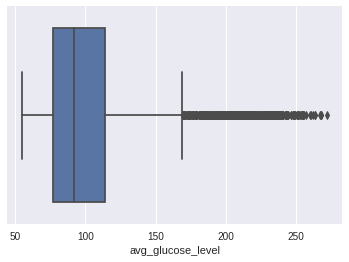

In [139]:
sns.boxplot(x=df["avg_glucose_level"])

we can determine that there are outliers in bmi 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


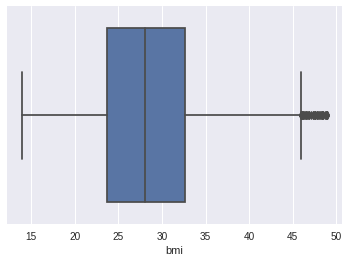

In [140]:
sns.boxplot(df.bmi)

now we will remove the outliers from avg_glucose_level column for this we will be using IQR method in which we will have to first find the IQR and then remove the outliers

In [141]:
q1 = df["avg_glucose_level"].quantile(0.25)
q3 = df["avg_glucose_level"].quantile(0.75)

IQR = q3 - q1
IQR

36.629999999999995

now we will find the upper limit and lower limit which will be applied on the dataset and we we will remove them from the data so around 600 rows are removed 

In [142]:
Lower_Limit = q1 - 1.5*IQR
Upper_Limit = q3 + 1.5*IQR
#removing the columns from dataset
df = df[(df["avg_glucose_level"]>Lower_Limit) & (df["avg_glucose_level"]<Upper_Limit)]
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4974,Male,58.0,0,0,Yes,Govt_job,Urban,84.94,30.2,never smoked,0
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


now we will do the same for bmi

In [143]:
q1 = df["bmi"].quantile(0.25)
q3 = df["bmi"].quantile(0.75)

IQR = q3 - q1
IQR

8.8

In [144]:
Lower_Limit = q1 - 1.5*IQR
Upper_Limit = q3 + 1.5*IQR
#removing the columns from datasert
df = df[(df["bmi"]>Lower_Limit) & (df["bmi"]<Upper_Limit)]
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4974,Male,58.0,0,0,Yes,Govt_job,Urban,84.94,30.2,never smoked,0
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


a totel of 654 rows were removed as they consisted of outliers

#Observing smoking status column 

In [145]:
df["smoking_status"].value_counts()

never smoked       1574
Unknown            1393
formerly smoked     705
smokes              664
Name: smoking_status, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


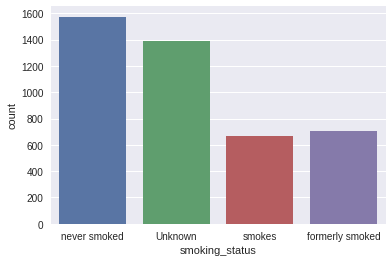

In [146]:
sns.countplot(df.smoking_status)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


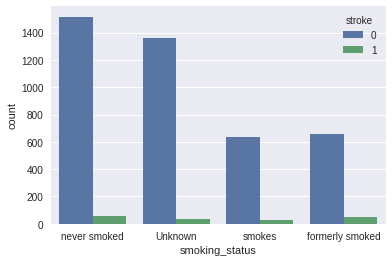

In [147]:
sns.countplot(df.smoking_status,hue=df.stroke)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


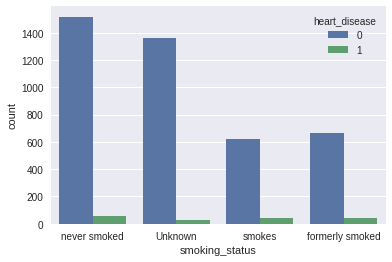

In [148]:
sns.countplot(df.smoking_status,hue=df.heart_disease)

#Handling Unknown in smoking_status columns

In [149]:
df = df.reset_index().drop(["index"], axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
1,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
2,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
3,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
4,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1


In [150]:
df.smoking_status.unique()

array(['never smoked', 'Unknown', 'smokes', 'formerly smoked'],
      dtype=object)

In [151]:
df["smoking_status"][df["smoking_status"] == "Unknown"].count()

1393

In [152]:
df['smoking_status'] = df["smoking_status"].replace(to_replace ='Unknown', value = None  )
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
1,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
2,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
3,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,never smoked,1
4,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4331,Male,58.0,0,0,Yes,Govt_job,Urban,84.94,30.2,never smoked,0
4332,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4333,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4334,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [153]:
for i in df.select_dtypes('object'):      
    print(df[i].value_counts())

    print(" ")
    print(" ")

Female    2557
Male      1779
Name: gender, dtype: int64
 
 
Yes    2720
No     1616
Name: ever_married, dtype: int64
 
 
Private          2468
children          661
Self-employed     657
Govt_job          550
Name: work_type, dtype: int64
 
 
Urban    2195
Rural    2141
Name: Residence_type, dtype: int64
 
 
never smoked       2376
formerly smoked     982
smokes              978
Name: smoking_status, dtype: int64
 
 


In [154]:
df.to_csv("data.csv",index=False)

#visualization 

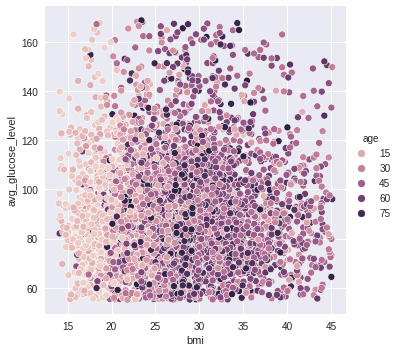

In [155]:
sns.relplot(x= 'bmi', y='avg_glucose_level' , hue = 'age',data= df,kind = 'scatter')

This pie chart indicates the number of peoples who have smoked and who have not .15.58 % of people smokes

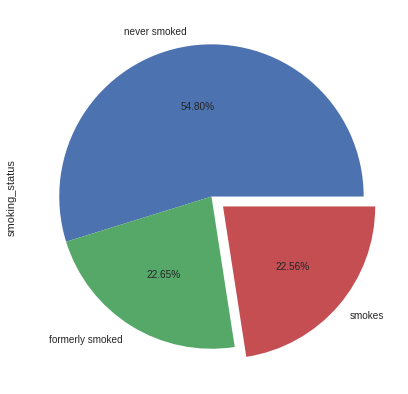

In [156]:
df["smoking_status"].value_counts().plot(kind="pie",autopct="%.2f%%",explode=(0,0,0.1),figsize=(8,7))

This pie chart is used to determine which work_type is mostly prefered by the people and from the pie chart it is clear that maximum people do private job.

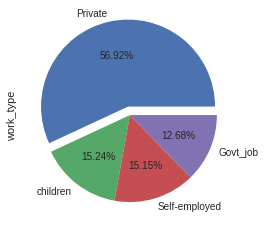

In [157]:
df["work_type"].value_counts().plot(kind="pie",autopct="%.2f%%",explode=(0.1,0,0,0))

now we will compare some columns and with eache other
here we will be comparing stroke and age

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


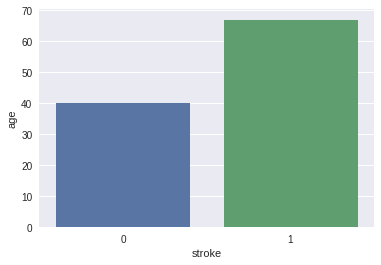

In [158]:
bar = sns.barplot(df.stroke,df.age,ci=None)

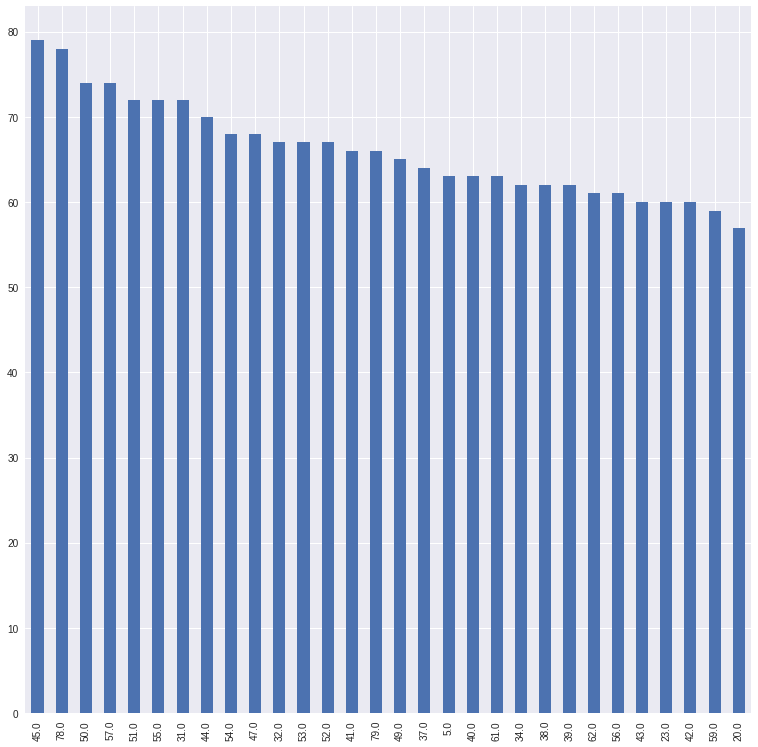

In [159]:
#no. of people by their age
df['age'].value_counts()[:20].plot(kind='bar',figsize=(13,13))

here we can find the relation of each and every column with each other so that we can determine their relationship 

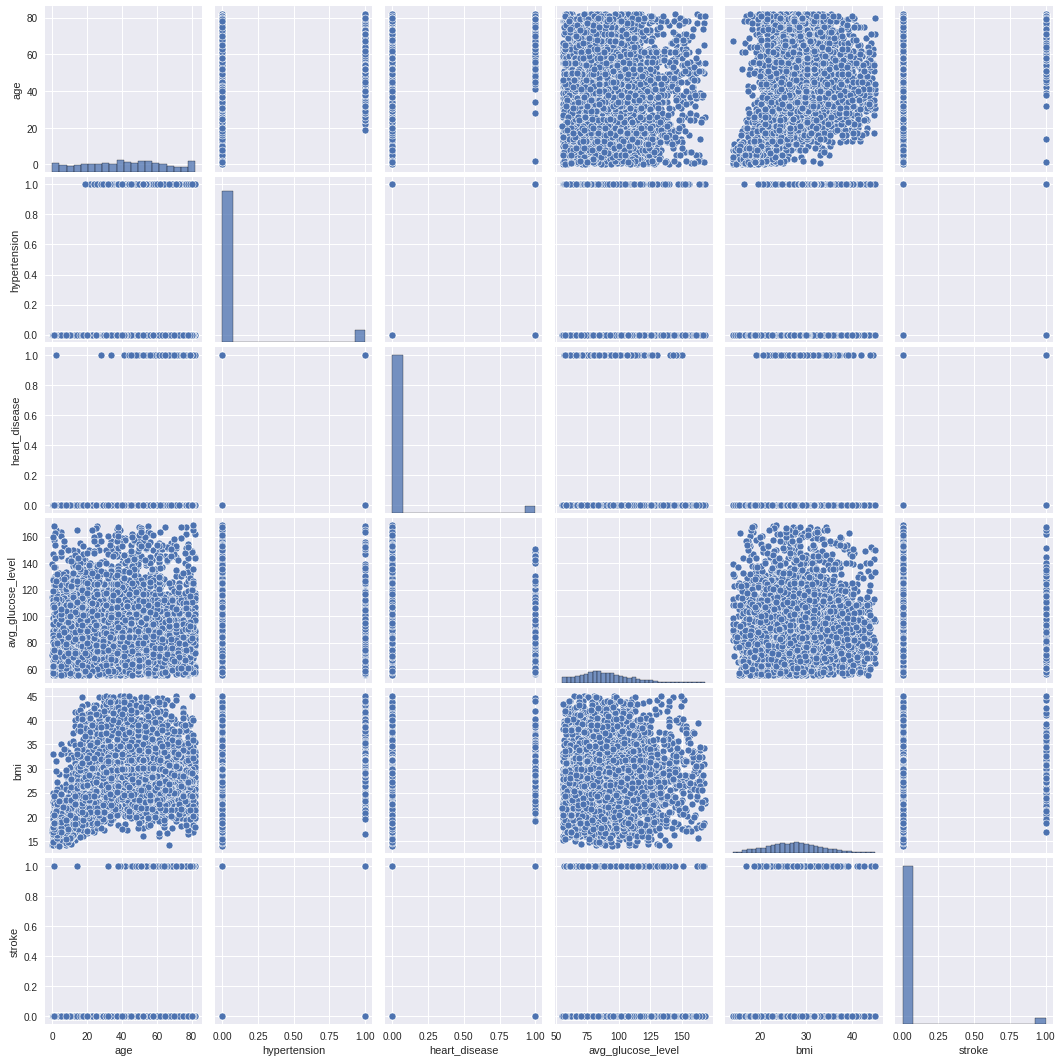

In [160]:
sns.pairplot(df)

we will save this into a new csv file to have a look at it as a csv file 

In [161]:
df.to_csv("full_data(1).csv",index=False)

we will determine how many unique values of bmi are there

In [162]:
df['bmi'].nunique()

310

[Text(0.5, 1.0, 'People who had stroke based on gender')]

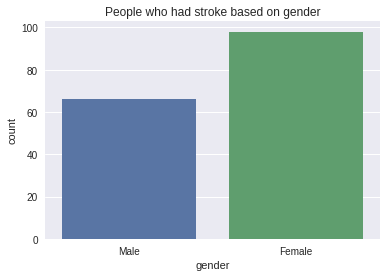

In [163]:
#comparision of no. of  people who had stroke based on gender
d1 = df[(df["stroke"] == 1)]
sns.countplot(x="gender",data=d1).set(title="People who had stroke based on gender")

[Text(0.5, 1.0, 'People who had stroke based on gender and work-type')]

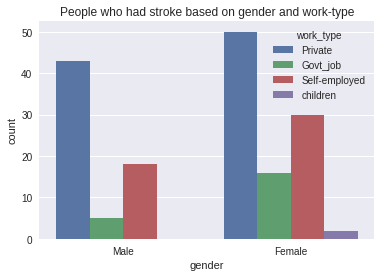

In [164]:
#People who had stroke based on gender and work-type
sns.countplot(data=d1,x="gender",hue="work_type").set(title="People who had stroke based on gender and work-type")

[Text(0.5, 1.0, 'People in who had stroke based on gender and Residence_type')]

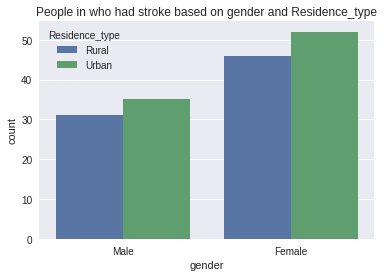

In [165]:
#comparision of no. of people in rural who had stroke based on gender and Residence
sns.countplot(data=d1,x="gender",hue="Residence_type").set(title="People in who had stroke based on gender and Residence_type")

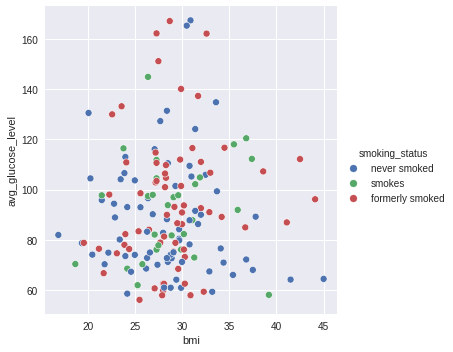

In [166]:
sns.relplot(x= 'bmi', y='avg_glucose_level' ,data= d1,hue ="smoking_status",kind = 'scatter')

#Stroke


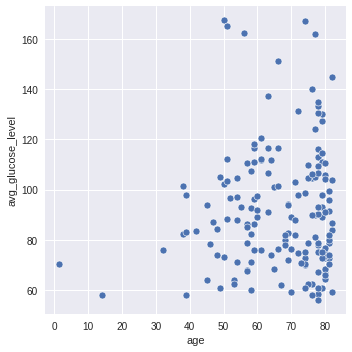

In [167]:
# d1['age'].mean(d1.avg_glucose_level).plot(kind='bar',figsize=(13,13))
sns.relplot(x= 'age', y='avg_glucose_level' ,data= d1,kind = 'scatter')

#as per reports people with glouse level >120 mg/dl are two time more likely to have a stroke but in our data people who had have age as a reason

#Graph focused on bmi and glouse level 

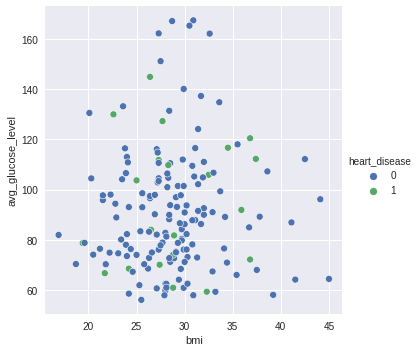

In [168]:
sns.relplot(x= 'bmi', y='avg_glucose_level' ,data= d1,hue ="heart_disease",kind = 'scatter')
#people with bmi >25 and high glouse level doesn't seems to be affected by that for heart disease

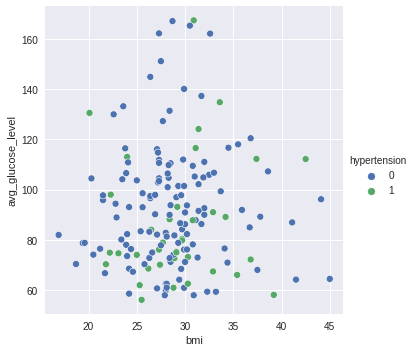

In [169]:
sns.relplot(x= 'bmi', y='avg_glucose_level' ,data= d1,hue ="hypertension",kind = 'scatter')
#people with bmi >25 and high glouse level doesn't seems to be affected by that for hyper tension

#Rural area

In [170]:
#to separarte people who had stroke but live in rural area
dr = d1[(d1["Residence_type"] == "Rural")]
dr


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
1,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
4,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
5,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1
7,Female,50.0,1,0,Yes,Self-employed,Rural,167.41,30.9,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4217,Female,79.0,1,1,No,Self-employed,Rural,60.94,28.8,never smoked,1
4218,Female,78.0,0,0,Yes,Self-employed,Rural,60.67,27.1,formerly smoked,1
4221,Male,79.0,0,0,Yes,Private,Rural,114.77,27.2,formerly smoked,1
4223,Male,74.0,0,0,Yes,Self-employed,Rural,60.98,28.1,never smoked,1


[Text(0.5, 1.0, 'Gender with no. of stroke in Rural ')]

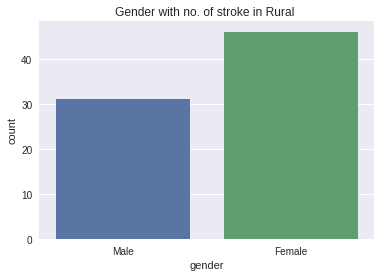

In [171]:
#Camparision of gender with no. of stroke in Rural
sns.countplot(x="gender",data=dr).set(title="Gender with no. of stroke in Rural ")

[Text(0.5, 1.0, 'People in rural who had stroke based on gender and work-type')]

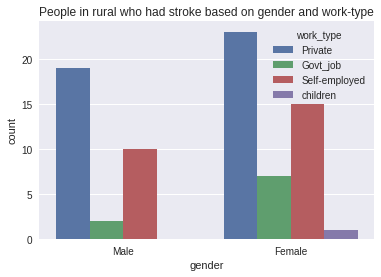

In [172]:
#comparision of no. of people in rural who had stroke based on gender and work-type
sns.countplot(data=dr,x="gender",hue="work_type").set(title="People in rural who had stroke based on gender and work-type")

#Urban area

In [173]:
#to separate people who had stroke but lives in urban
du = d1[(d1["Residence_type"] == "Urban")]

[Text(0.5, 1.0, 'Gender with no. of stroke in Rural ')]

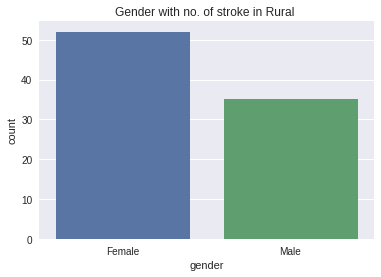

In [174]:
#Camparision of gender with no. of stroke
sns.countplot(x="gender",data=du).set(title="Gender with no. of stroke in Rural ")

[Text(0.5, 1.0, 'People in rural who had stroke based on gender and work-type')]

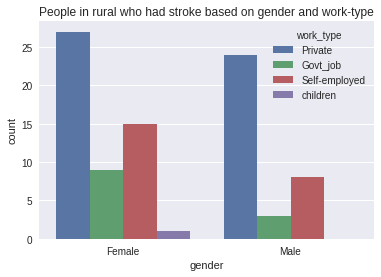

In [175]:
#comparision of no. of people in rural who had stroke based on gender and work-type
sns.countplot(data=du,x="gender",hue="work_type").set(title="People in rural who had stroke based on gender and work-type")

# graphs based on gender and work type

[Text(0.5, 1.0, 'no. of male who had stroke based on work type')]

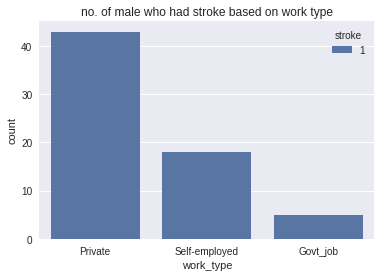

In [176]:
#a bargraph about no. of male who had stroke based on work type
dm = d1[(d1["gender"] == "Male")]
sns.countplot(x="work_type",hue="stroke",data=dm).set(title="no. of male who had stroke based on work type")

[Text(0.5, 1.0, 'no. of female who had stroke based on work type')]

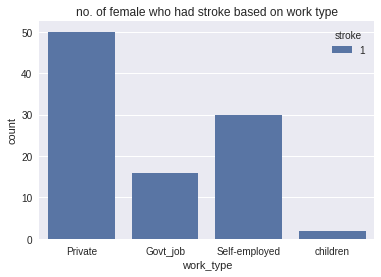

In [177]:
#a bargraph about no. of female who had stroke based on work type
df1 = d1[(d1["gender"] == "Female")]
sns.countplot(x="work_type",hue="stroke",data=df1).set(title="no. of female who had stroke based on work type")

[Text(0.5, 1.0, 'people who had stroke and are married')]

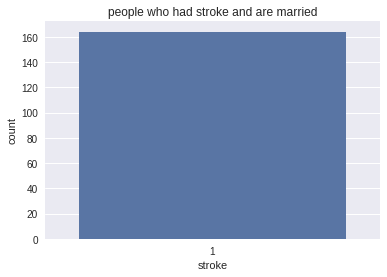

In [178]:
#de have with people who had stroke and are married
de = d1[(d1["ever_married"] == "Yes")]
sns.countplot(x="stroke",data=d1).set(title="people who had stroke and are married")

[Text(0.5, 1.0, 'people who had stroke and are not married')]

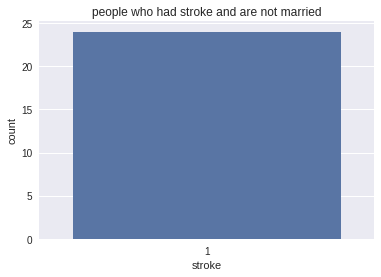

In [179]:
#den have with people who had stroke and are not married
den = d1[(d1["ever_married"] == "No")]
sns.countplot(x="stroke",data=den).set(title="people who had stroke and are not married")

[Text(0.5, 1.0, 'people id they had stroke and if are married')]

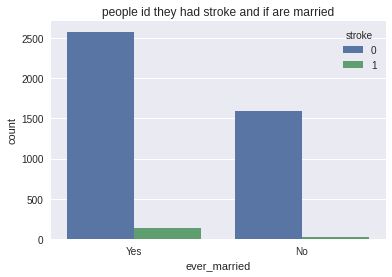

In [180]:
#grapg to see people who had stroke and if are married
sns.countplot(x="ever_married",hue="stroke",data=df).set(title="people id they had stroke and if are married")

[Text(0.5, 1.0, 'people who had stroke and if married or not')]

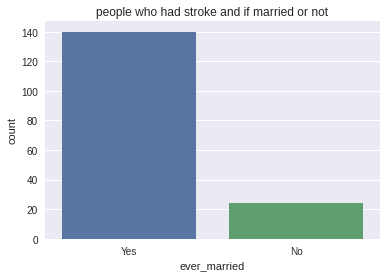

In [181]:
#graph for people who had stroke and if married or not
sns.countplot(x="ever_married",data=d1).set(title="people who had stroke and if married or not")

#classification

In [182]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
1,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
2,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
3,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,never smoked,1
4,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1


In [183]:
display(df)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
1,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
2,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
3,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,never smoked,1
4,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4331,Male,58.0,0,0,Yes,Govt_job,Urban,84.94,30.2,never smoked,0
4332,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4333,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4334,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [184]:
df.heart_disease.value_counts()

0    4164
1     172
Name: heart_disease, dtype: int64

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4336 entries, 0 to 4335
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4336 non-null   object 
 1   age                4336 non-null   float64
 2   hypertension       4336 non-null   int64  
 3   heart_disease      4336 non-null   int64  
 4   ever_married       4336 non-null   object 
 5   work_type          4336 non-null   object 
 6   Residence_type     4336 non-null   object 
 7   avg_glucose_level  4336 non-null   float64
 8   bmi                4336 non-null   float64
 9   smoking_status     4336 non-null   object 
 10  stroke             4336 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 372.8+ KB


In [186]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [187]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

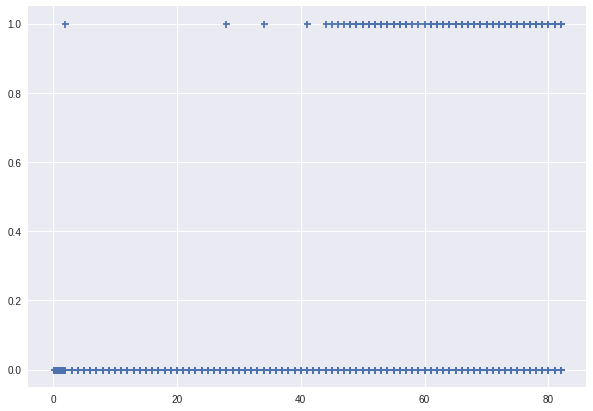

In [188]:
plt.figure(figsize=(10, 7))
plt.scatter(df.age,df.heart_disease,marker="+")

#encoding

In [189]:
non_numeric=df.select_dtypes(exclude=np.number).columns

In [190]:
non_numeric

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [191]:
df.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
733,Female,49.0,0,0,No,Private,Rural,65.81,32.3,never smoked,0
1581,Male,2.0,0,0,No,children,Urban,112.92,18.4,never smoked,0
3336,Female,82.0,0,1,Yes,Self-employed,Rural,88.60,32.5,never smoked,0
3426,Female,11.0,0,0,No,children,Urban,88.79,21.3,never smoked,0
3330,Male,3.0,0,0,No,children,Urban,107.52,17.6,never smoked,0


In [192]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
1,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
2,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
3,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,never smoked,1
4,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1


In [193]:
display(df)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
1,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
2,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
3,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,never smoked,1
4,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4331,Male,58.0,0,0,Yes,Govt_job,Urban,84.94,30.2,never smoked,0
4332,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4333,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4334,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [194]:
label_encoder = LabelEncoder()

In [195]:
for i in non_numeric:
    df[i] = label_encoder.fit_transform(df[i])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,80.0,0,1,1,1,0,105.92,32.5,1,1
1,1,74.0,1,1,1,1,0,70.09,27.4,1,1
2,0,69.0,0,0,0,1,1,94.39,22.8,1,1
3,0,78.0,0,0,1,1,1,58.57,24.2,1,1
4,0,81.0,1,0,1,1,0,80.43,29.7,1,1


#splitting Test for predicting stroke

In [196]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,80.0,0,1,1,1,0,105.92,32.5,1,1
1,1,74.0,1,1,1,1,0,70.09,27.4,1,1


In [197]:
X = df.drop("stroke",axis= 1)
Y = df.stroke

In [198]:
#Here,X have every column except Stroke and Y only have stroke column 
X_train,X_test,y_train,y_test =train_test_split(X,Y,test_size=0.2,random_state=2)

In [199]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3468, 10)
(868, 10)
(3468,)
(868,)


In [200]:
display(X_test)
display(y_test)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
313,0,66.0,0,0,1,0,1,87.24,22.5,0
1146,0,49.0,0,0,1,1,0,96.85,35.5,1
671,0,51.0,1,0,1,1,1,72.62,30.5,1
1343,0,23.0,0,0,0,1,1,124.50,33.4,0
1792,0,9.0,0,0,0,3,0,125.09,15.4,1
...,...,...,...,...,...,...,...,...,...,...
1063,1,4.0,0,0,0,3,1,132.41,16.3,1
2458,0,62.0,0,0,1,0,1,67.07,24.5,1
3029,1,45.0,0,0,1,1,0,99.91,30.9,1
1071,1,35.0,0,0,1,1,0,108.08,30.6,0


313     0
1146    0
671     0
1343    0
1792    0
       ..
1063    0
2458    0
3029    0
1071    0
2221    0
Name: stroke, Length: 868, dtype: int64

In [201]:
model=LogisticRegression(max_iter=10000)

In [202]:
X_train= X_train.values
X_test=X_test.values

In [203]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [204]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [205]:
df["stroke"].value_counts()

0    4172
1     164
Name: stroke, dtype: int64

In [206]:
model.score(X_test,y_test)

0.9527649769585254

In [207]:
model.predict_proba(X_test)

array([[0.89289331, 0.10710669],
       [0.98181841, 0.01818159],
       [0.95608008, 0.04391992],
       ...,
       [0.9864808 , 0.0135192 ],
       [0.99023647, 0.00976353],
       [0.99854321, 0.00145679]])

In [208]:
model.predict_proba(X_test)

array([[0.89289331, 0.10710669],
       [0.98181841, 0.01818159],
       [0.95608008, 0.04391992],
       ...,
       [0.9864808 , 0.0135192 ],
       [0.99023647, 0.00976353],
       [0.99854321, 0.00145679]])

In [209]:
df


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,80.0,0,1,1,1,0,105.92,32.5,1,1
1,1,74.0,1,1,1,1,0,70.09,27.4,1,1
2,0,69.0,0,0,0,1,1,94.39,22.8,1,1
3,0,78.0,0,0,1,1,1,58.57,24.2,1,1
4,0,81.0,1,0,1,1,0,80.43,29.7,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4331,1,58.0,0,0,1,0,1,84.94,30.2,1,0
4332,1,41.0,0,0,0,1,0,70.15,29.8,0,0
4333,0,45.0,1,0,1,0,0,95.02,31.8,2,0
4334,1,40.0,0,0,1,1,0,83.94,30.0,2,0


#ROC curve

In [210]:
pred_prob1 = model.predict_proba(X_test)

In [211]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [212]:
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])

print(auc_score1)

0.8574630607249241


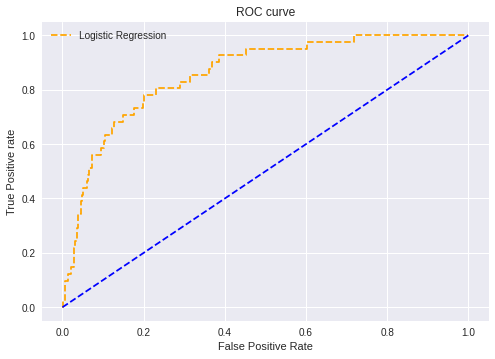

In [213]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();